In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv(r"C:\Users\NAMAN\Downloads\IMDb_Movies_India.csv", encoding=('ISO-8859-1'))
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [5]:
print(df.shape)
df.info()

(15509, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [6]:
print(df.columns)
print(df.isna().sum())

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')
Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64


In [7]:
df.dropna(inplace=True)

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df['Year'] = df['Year'].str.replace('[()]','',regex=True).astype(int)

df['Duration'] = df['Duration'].str.replace('min','').astype(int)

df['Genre'].fillna(df['Genre'].mode()[0],inplace=True)

df['Votes'] = df['Votes'].str.replace(',','').astype(int)

df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [10]:
cat_features =[feature for feature in df.columns if df[feature].dtype == 'O']
print('We have {} no of Cat_features and those are : {}'.format(len(cat_features),cat_features)) 
num_features =[feature for feature in df.columns if df[feature].dtype != 'O']
print('We have {} no of Num_features and those are : {}'.format(len(num_features),num_features)) 

We have 6 no of Cat_features and those are : ['Name', 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
We have 4 no of Num_features and those are : ['Year', 'Duration', 'Rating', 'Votes']


In [11]:
df_cat = df[['Name', 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']]
df_num = df[['Year', 'Duration', 'Rating', 'Votes']]

In [12]:
df_cast = df[['Name','Director', 'Actor 1', 'Actor 2', 'Actor 3']]

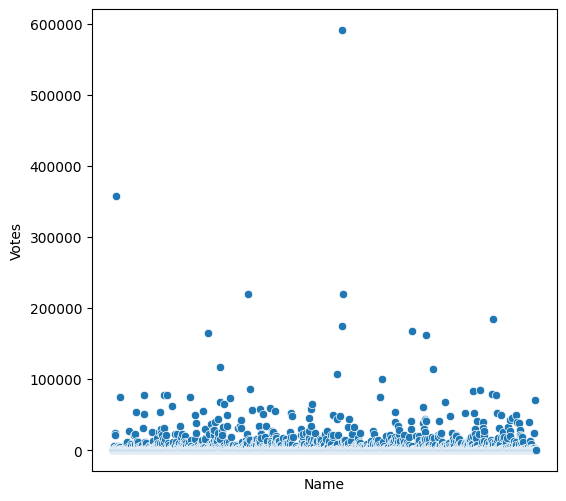

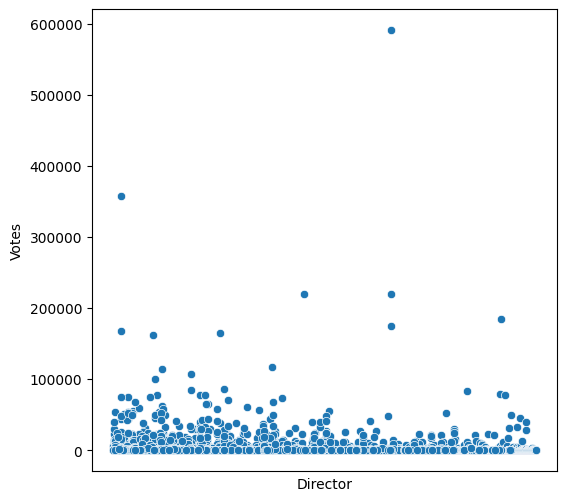

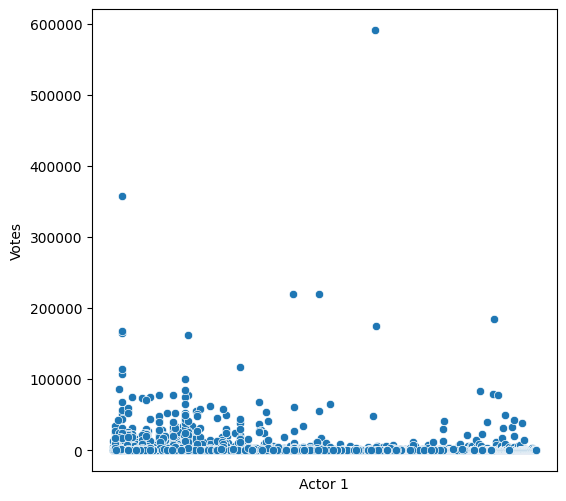

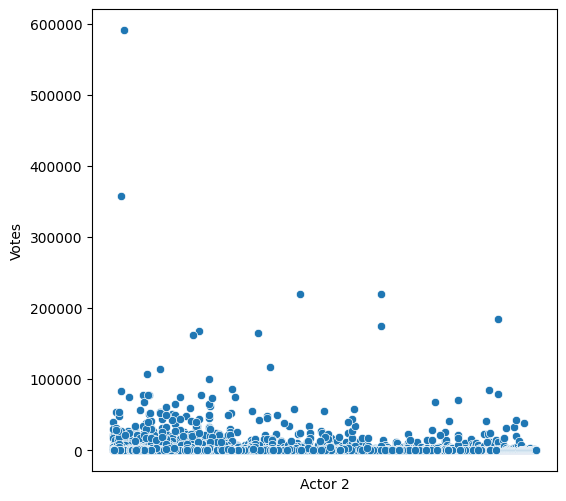

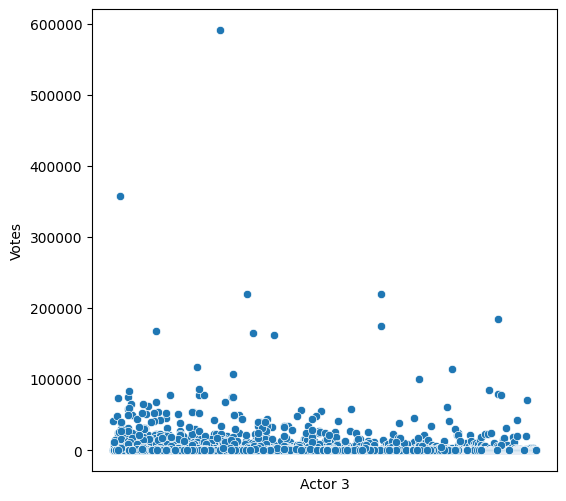

In [13]:
for i in df_cast.columns:
    plt.figure(figsize=(6,6))
    sns.scatterplot(data=df,x=i,y='Votes')
    plt.xticks([])
    plt.show()

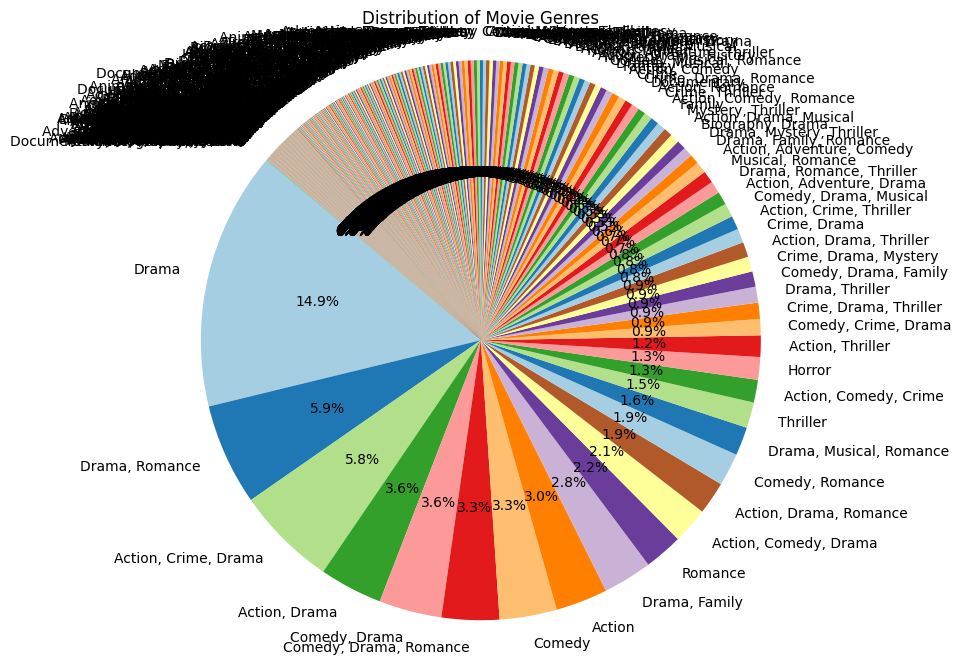

In [14]:
genre_counts = df['Genre'].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Movie Genres')
plt.axis('equal')
plt.show()

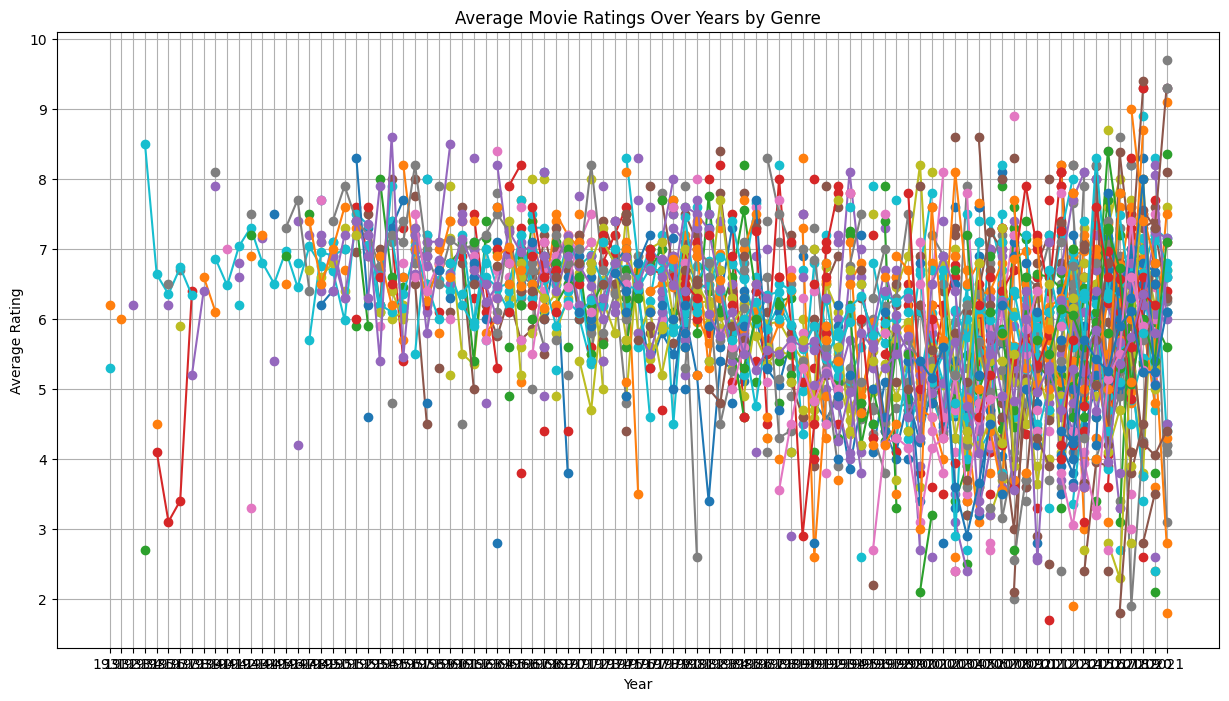

In [16]:
grouped_df = df.groupby(['Year', 'Genre'])['Rating'].mean().unstack()

plt.figure(figsize=(15, 8))
for genre in grouped_df.columns:
    plt.plot(grouped_df.index, grouped_df[genre], marker='o', label=genre)

plt.title('Average Movie Ratings Over Years by Genre')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.xticks(grouped_df.index)
plt.show()

In [17]:
df.drop(columns='Duration',inplace=True)

In [18]:
df['Name'] = df.groupby('Name')['Rating'].transform('mean')
df['Genre'] = df.groupby('Genre')['Rating'].transform('mean')
df['Director'] = df.groupby('Director')['Rating'].transform('mean')
df['Actor 1'] = df.groupby('Actor 1')['Rating'].transform('mean')
df['Actor 2'] = df.groupby('Actor 2')['Rating'].transform('mean')
df['Actor 3'] = df.groupby('Actor 3')['Rating'].transform('mean')

<Axes: >

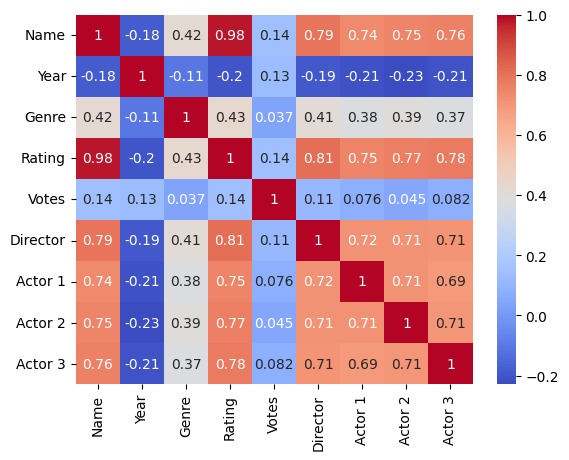

In [19]:
data_matrix = df.corr()
sns.heatmap(data_matrix,annot=True,cmap='coolwarm')

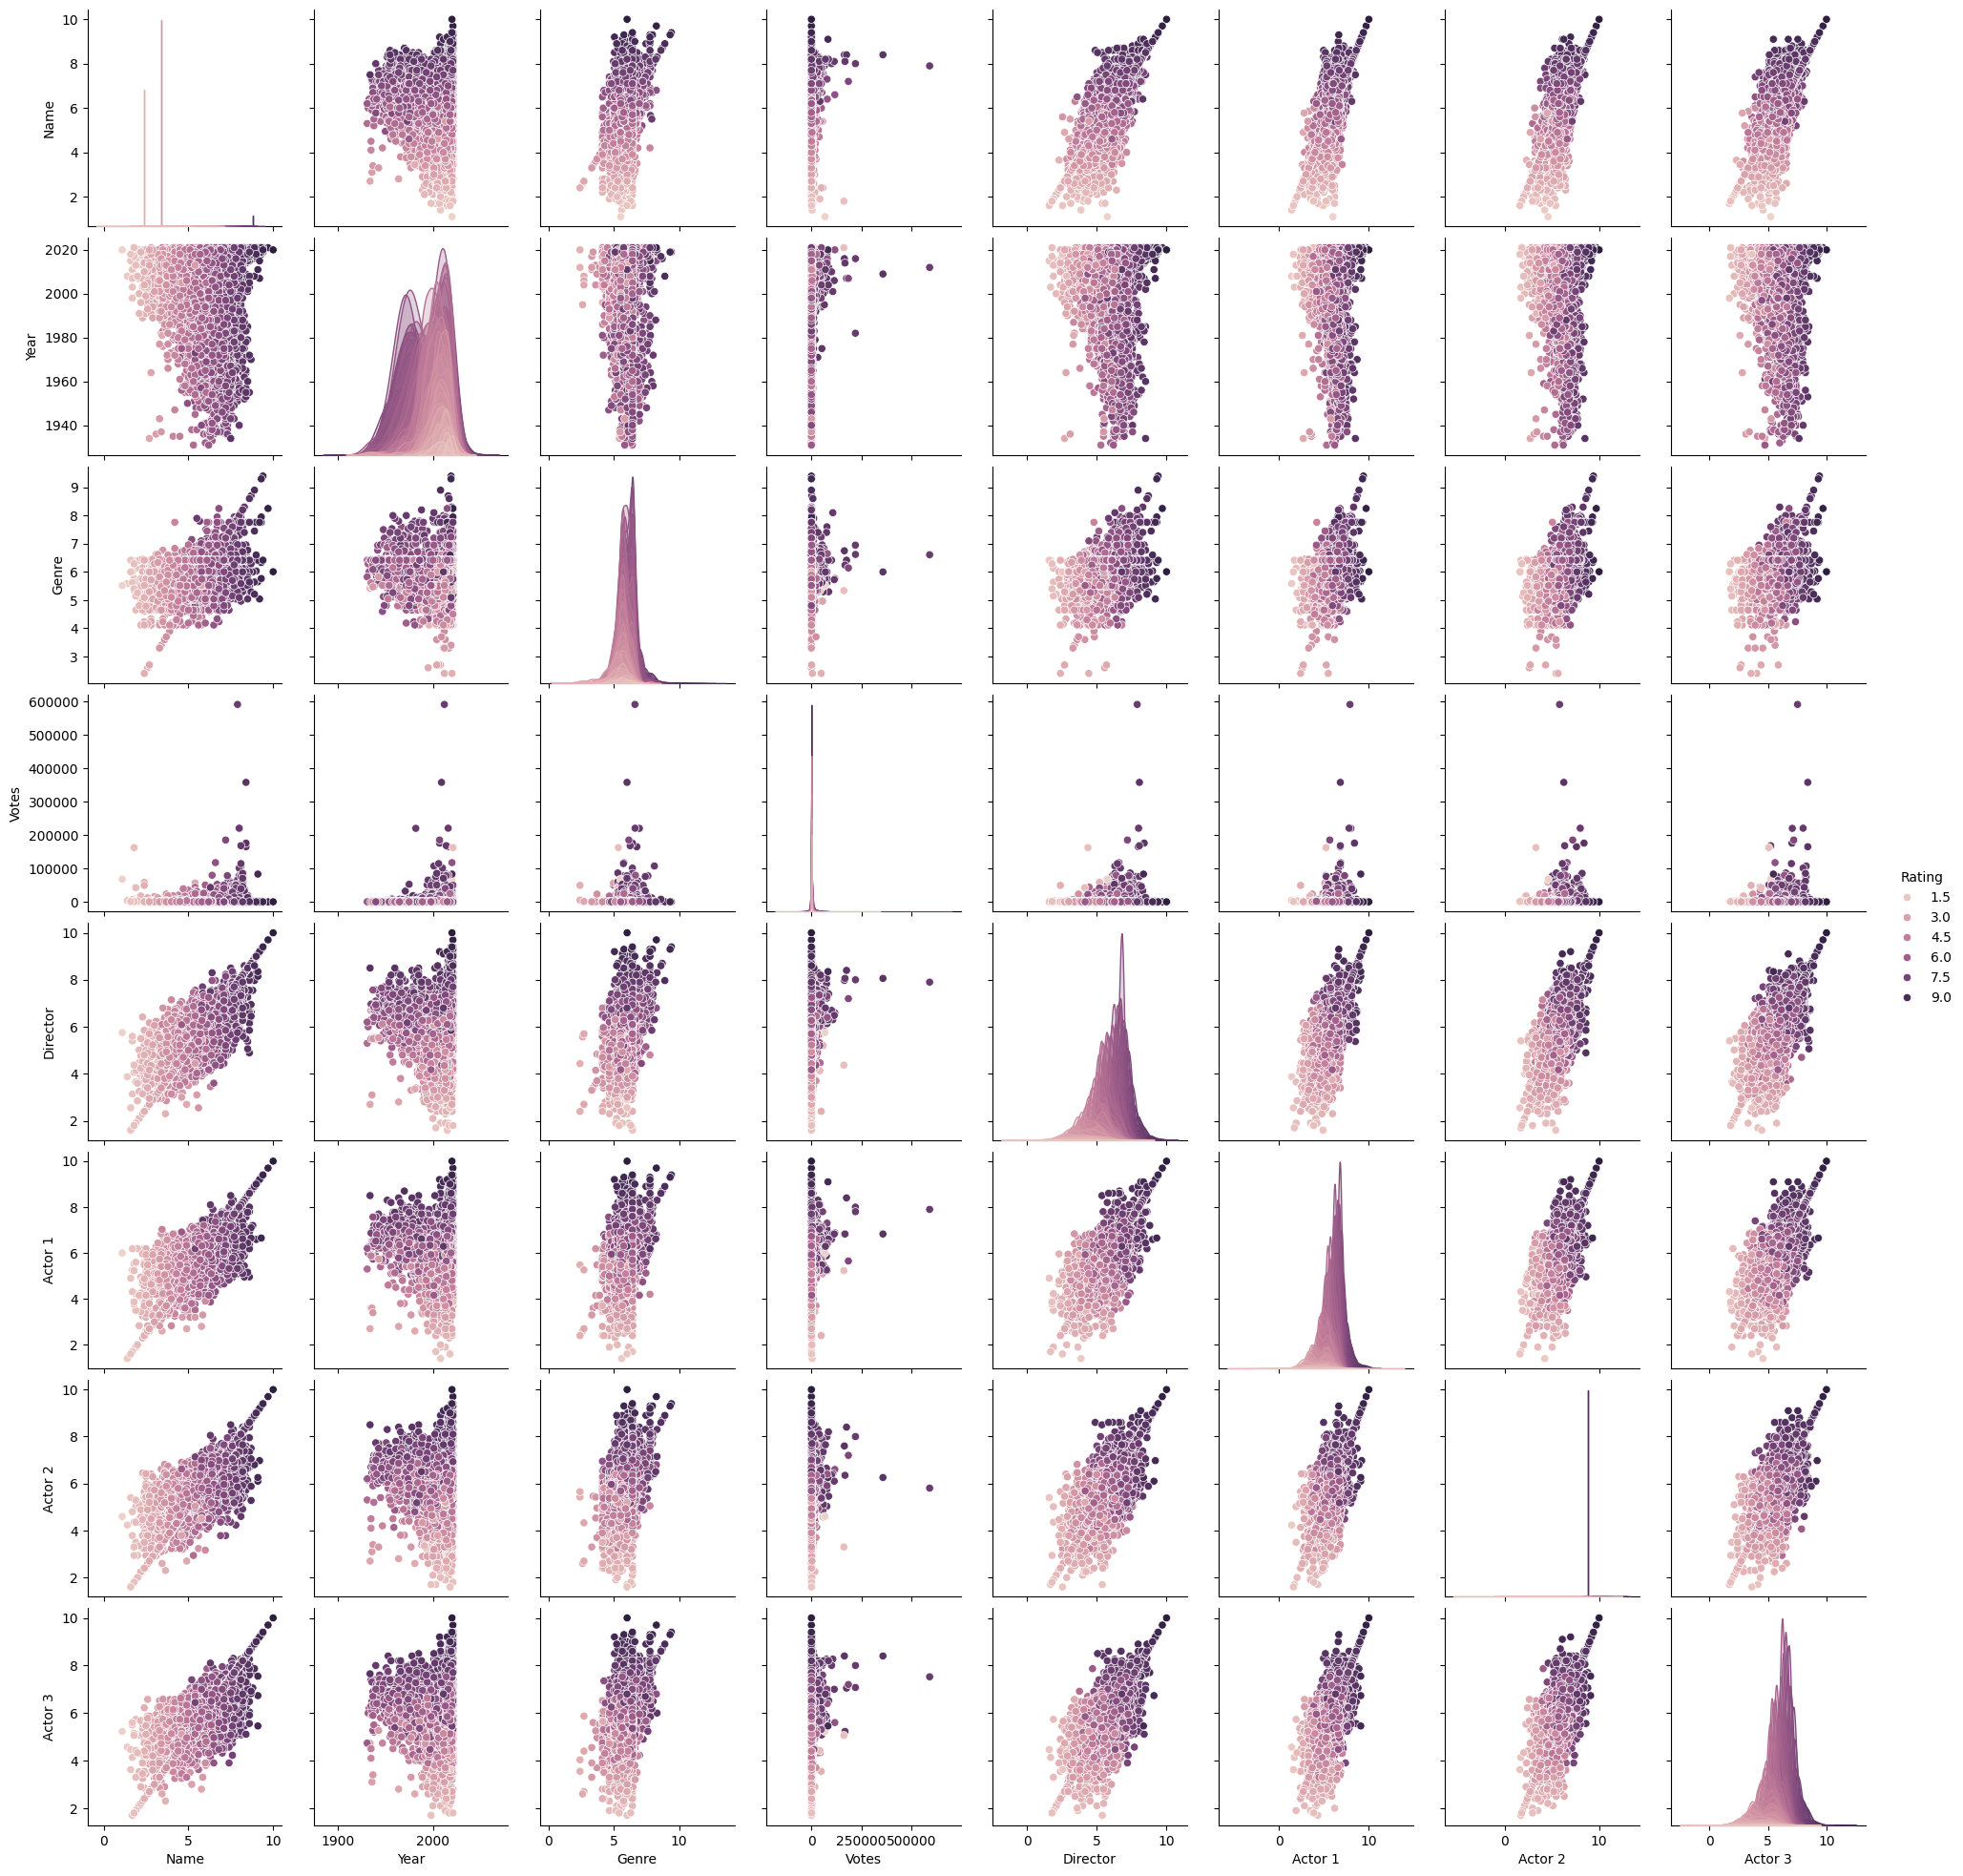

In [20]:
sns.pairplot(data=df,hue='Rating')

In [18]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

In [19]:
X = df.drop(columns=['Rating'],axis=1)
y = df['Rating']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
models = {
    'LinearRegression' : LinearRegression(),
    'Decision tree' : DecisionTreeRegressor(),
    'Random Forest' : RandomForestRegressor(),
    'xgboost' : XGBRegressor(),
    'Support vector machine' : SVR()
}

In [23]:
for name ,model in models.items():
    model.fit(X_train_scaled,y_train)
    y_pred = model.predict(X_test_scaled)
    print(f'Name of the model : {name}')
    print('mean_squared_error : ',mean_squared_error(y_test,y_pred))
    print('mean_absolute_error : ',mean_absolute_error(y_test,y_pred))
    print('r2_score : ',r2_score(y_test,y_pred))
    print('-' * 50)

Name of the model : LinearRegression
mean_squared_error :  0.0647642788370664
mean_absolute_error :  0.13115772475571733
r2_score :  0.9650252458150039
--------------------------------------------------
Name of the model : Decision tree
mean_squared_error :  0.10059187279151946
mean_absolute_error :  0.10326855123675145
r2_score :  0.9456772145530594
--------------------------------------------------
Name of the model : Random Forest
mean_squared_error :  0.05064170936395764
mean_absolute_error :  0.08808745583039136
r2_score :  0.9726518789629641
--------------------------------------------------
Name of the model : xgboost
mean_squared_error :  0.05013788723575397
mean_absolute_error :  0.10667822902278432
r2_score :  0.972923958810116
--------------------------------------------------
Name of the model : Support vector machine
mean_squared_error :  0.06993730837980137
mean_absolute_error :  0.12426057426507196
r2_score :  0.9622316466288838
------------------------------------------

In [24]:
X.head()

,Name,Year,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
1,7.0,2019,6.415521,8,7.000000,6.850000,7.000000,7.000000
3,4.4,2019,5.716822,35,4.400000,5.420000,4.400000,4.450000
5,4.7,1997,6.242222,827,5.313333,4.788889,5.786667,5.872727
6,7.4,2005,6.820000,1086,7.383333,5.435000,6.933333,6.500000
8,5.6,2012,5.477778,326,5.600000,5.600000,5.883333,5.600000


In [36]:
y.head(9)

1     7.0
3     4.4
5     4.7
6     7.4
8     5.6
9     4.0
10    6.2
11    5.9
12    6.5
Name: Rating, dtype: float64

In [32]:
data = {
    'Name':[7.0],
    'Year':[2007],
    'Genre':[6.5],
    'Votes':[1000],
    'Director':[6.8],
    'Actor 1':[5.5],
    'Actor 2':[5.9],
    'Actor 3':[6.0]
}

Test = pd.DataFrame(data)

In [34]:
xg = XGBRegressor()
xg.fit(X_train_scaled,y_train)
test_rating = xg.predict(Test)
print('test_rating : ',test_rating)

test_rating :  [9.820873]
